In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
true_value = np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 1])
num_episodes = 1000
alpha = 0.01

In [36]:
# Define the TD learning algorithm
def TD_learning(num_episodes, alpha):
    value = np.zeros(7)
    for episode in range(num_episodes):
        state = 3
        while state != 6:
            next_state = np.random.randint(0, 7)
            
            if next_state == 6:
                reward = 0
            else:
                reward = -1
                
            delta = reward + value[next_state] - value[state]
            value[state] += alpha * delta
            state = next_state
    return value

In [37]:
def MC_learning(num_episodes, alpha):
    value = np.zeros(7)
    for episode in range(num_episodes):
        state = 3
        episode_states = [3]
        episode_rewards = []
        while state != 6:
            next_state = np.random.randint(0, 7)
            reward = 0 if next_state == 6 else -1
            episode_states.append(next_state)
            episode_rewards.append(reward)
            state = next_state
        G = 0
        for i in range(len(episode_states)-1, -1, -1):
            state = episode_states[i]
            reward = episode_rewards[i-1]
            G = reward + G
            value[state] = value[state] + alpha * (G - value[state])
    return value

In [38]:
TD_values = TD_learning(num_episodes, alpha)

In [39]:
MC_values = MC_learning(num_episodes, alpha)

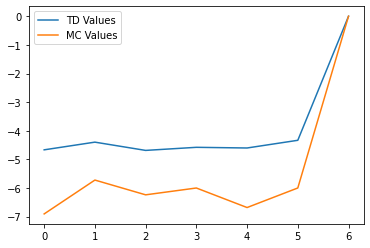

In [40]:
# Plot the true state-value function and the estimated values
#plt.plot(true_value, label='True Values')
plt.plot(TD_values, label='TD Values')
plt.plot(MC_values, label='MC Values')
plt.legend()
plt.show()